In [3]:
## import packages

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


# to gnore warning

import warnings
warnings.filterwarnings('ignore')

In [4]:
crop = pd.read_csv(r"F:\project\project 3\Agri_Data.csv")

In [5]:
crop

District_Name       Season       Crop    N kg/ha   P  kg/ha   K  kg/ha  \
0         ADILABAD  Kharif       Arhar/Tur  25.399955  44.023330  47.866532   
1         ADILABAD  Kharif       Arhar/Tur  25.942129  43.686642  46.978921   
2         ADILABAD  Rabi         Arhar/Tur  25.481752  44.183059  47.628207   
3         ADILABAD  Kharif       Arhar/Tur  29.236268  43.543630  48.151850   
4         ADILABAD  Rabi         Arhar/Tur  27.062090  44.683242  48.497706   
...            ...          ...        ...        ...        ...        ...   
4915      WARANGAL  Rabi             Wheat  60.324727  29.907642  28.842461   
4916      WARANGAL  Rabi             Wheat  60.077498  30.760258  30.008775   
4917      WARANGAL  Rabi             Wheat  60.527319  30.894878  29.131273   
4918      WARANGAL  Rabi             Wheat  60.301643  29.267801  28.669416   
4919      WARANGAL  Rabi             Wheat  59.304489  29.147869  30.515483   

            ph  Humidity_Min  Humidity_Max  Humidity_around  Rainfall  \
0     7.109764          29.1          41.2            35.15     798.6   
1     7.419597          21.1          40.3            30.70    1104.0   
2     6.686975          25.4          49.4            37.40     985.8   
3     7.505164          15.8          47.2            31.50     816.0   
4     7.435820          26.1          61.1            43.60     967.0   
...        ...           ...           ...              ...       ...   
4915  6.966914          30.0          79.5            54.75    1280.0   
4916  6.792731          15.7          40.6            28.15    1007.6   
4917  6.107228          34.5          58.2            46.35     983.0   
4918  6.253218          45.1          87.6            66.35     846.6   
4919  6.492336          31.9          89.5            60.70     636.6   

      Temp_around   Area  Production  
0       36.388150  32200      1100.0  
1       38.384425  35900     12700.0  
2       39.089421    100       100.0  
3       38.594861  38996      9437.0  
4       40.990483    767       186.0  
...           ...    ...         ...  
4915    22.171909     51        30.0  
4916    23.613905     45        24.0  
4917    22.291382     36        30.0  
4918    24.048036     45        42.0  
4919    21.400858     20        26.0  

[4920 rows x 14 columns]

# Data fields
### N - ratio of Nitrogen content in soil
### P - ratio of Phosphorous content in soil
### K - ratio of Potassium content in soil
### temperature - temperature in degree Celsius
### humidity - relative humidity in %
### ph - ph value of the soil
### rainfall - rainfall in mm
### Area
### District_Name
### Season
### Crop

In [6]:
## shape

print("The Shape of the Dataset is: {}" .format(crop.shape))
print("The number of the columns in the Dataset is: {}" .format(crop.shape[1]))
print("The Shape of the row in the Dataset is: {}" .format(crop.shape[0]))

The Shape of the Dataset is: (4920, 14)
The number of the columns in the Dataset is: 14
The Shape of the row in the Dataset is: 4920


In [7]:
## info

crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District_Name    4920 non-null   object 
 1   Season           4920 non-null   object 
 2   Crop             4920 non-null   object 
 3   N kg/ha          4920 non-null   float64
 4   P  kg/ha         4920 non-null   float64
 5   K  kg/ha         4920 non-null   float64
 6   ph               4920 non-null   float64
 7   Humidity_Min     4920 non-null   float64
 8   Humidity_Max     4920 non-null   float64
 9   Humidity_around  4920 non-null   float64
 10  Rainfall         4918 non-null   float64
 11  Temp_around      4920 non-null   float64
 12  Area             4920 non-null   int64  
 13  Production       4886 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 538.2+ KB


In [8]:
# type of data

crop.dtypes

District_Name       object
Season              object
Crop                object
N kg/ha            float64
P  kg/ha           float64
K  kg/ha           float64
ph                 float64
Humidity_Min       float64
Humidity_Max       float64
Humidity_around    float64
Rainfall           float64
Temp_around        float64
Area                 int64
Production         float64
dtype: object

In [10]:
## count unique values in 'label' columns

crop['Crop'].value_counts()

Rice                         313
Maize                        306
Jowar                        298
Groundnut                    295
Dry chillies                 290
Moong(Green Gram)            262
Sesamum                      254
Urad                         252
Arhar/Tur                    218
Onion                        203
Horse-gram                   196
Bajra                        184
Sunflower                    178
Castor seed                  156
Cotton(lint)                 153
Sugarcane                    128
Tobacco                      124
Turmeric                     113
Ragi                         110
Wheat                        107
Coriander                    105
Safflower                     86
Soyabean                      67
Sweet potato                  51
Dry ginger                    46
Cowpea(Lobia)                 45
Rapeseed &Mustard             42
Linseed                       39
Mesta                         38
Potato                        34
Garlic    

In [11]:
## count unique values in 'Season' columns

crop['Season'].value_counts()

Kharif         2200
Rabi           1944
Whole Year      776
Name: Season, dtype: int64

In [12]:
## lets check null values

crop.isnull().sum()

District_Name       0
Season              0
Crop                0
N kg/ha             0
P  kg/ha            0
K  kg/ha            0
ph                  0
Humidity_Min        0
Humidity_Max        0
Humidity_around     0
Rainfall            2
Temp_around         0
Area                0
Production         34
dtype: int64

# Descriptive Statistics

In [13]:
## descripe

crop.describe()

N kg/ha     P  kg/ha     K  kg/ha           ph  Humidity_Min  \
count  4920.000000  4920.000000  4920.000000  4920.000000   4920.000000   
mean     54.506052    37.813303    32.664444     6.330003     40.726707   
std      42.320716    20.226669    18.111641     0.905339     21.873025   
min       5.542082    10.038336    11.511405     3.030397      4.400000   
25%      20.094323    24.616994    18.965595     5.957443     22.700000   
50%      40.058075    32.263822    29.146830     6.437534     36.450000   
75%      85.113829    45.355416    44.873965     6.963438     57.000000   
max     150.999378   150.989782    80.990777     8.098821     99.400000   

       Humidity_Max  Humidity_around     Rainfall  Temp_around           Area  \
count   4920.000000      4920.000000  4918.000000  4920.000000    4920.000000   
mean      79.454837        60.090772   760.007727    26.489978   16159.752033   
std       17.441835        18.212296   307.160590     5.052983   35298.089894   
min       16.300000        11.350000   138.400000     1.064824       1.000000   
25%       67.700000        45.687500   493.400000    22.845014     300.000000   
50%       82.700000        59.600000   751.400000    26.459445    2000.000000   
75%       95.500000        74.850000   983.000000    29.399688   13985.000000   
max      100.000000        99.700000  1628.600000    40.990483  361169.000000   

         Production  
count  4.886000e+03  
mean   4.623833e+04  
std    1.639679e+05  
min    0.000000e+00  
25%    2.420000e+02  
50%    2.396000e+03  
75%    1.898750e+04  
max    2.645000e+06

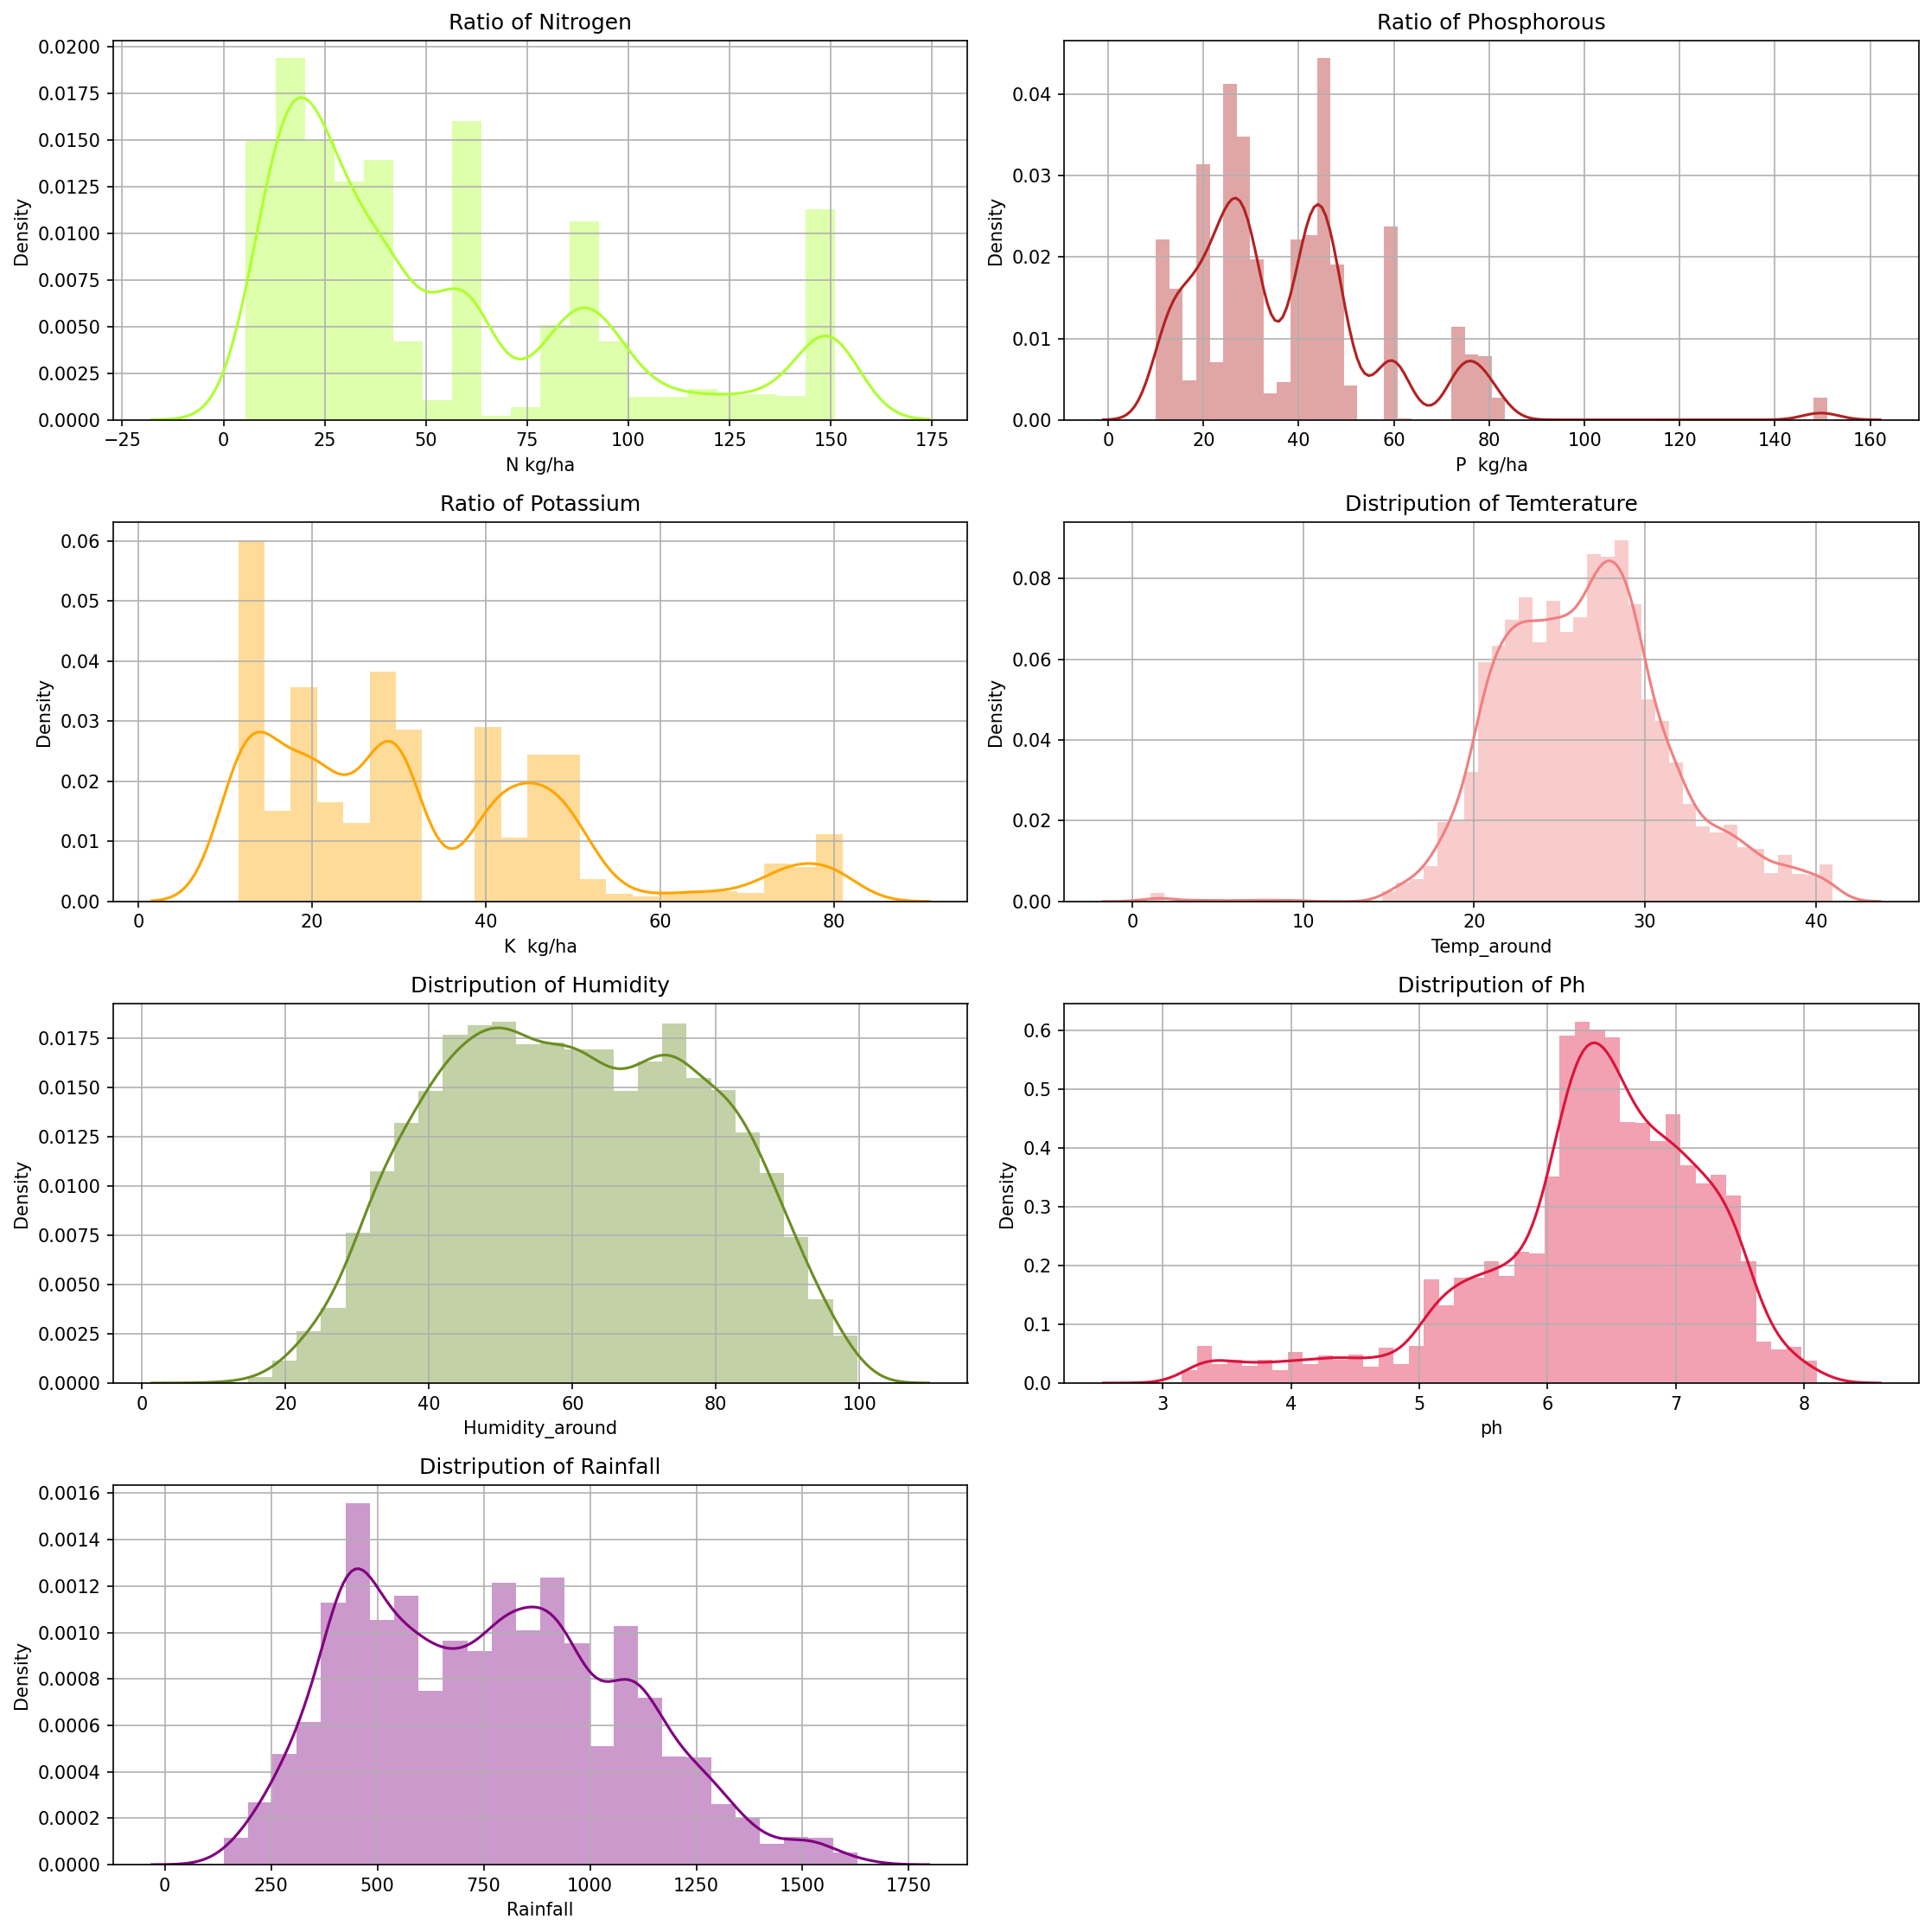

In [31]:
## over all distribution

plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.dpi'] = 150

# ratio of Nitrogen content in soil
plt.subplot(4, 2, 1)
sns.distplot(crop['N kg/ha'], color='greenyellow')
plt.title('Ratio of Nitrogen', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Phosphorous content in soil
plt.subplot(4, 2, 2)
sns.distplot(crop['P  kg/ha'], color='firebrick')
plt.title('Ratio of Phosphorous', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Potassium content in soil

plt.subplot(4, 2, 3)
sns.distplot(crop['K  kg/ha'], color = 'orange')
plt.title('Ratio of Potassium', fontsize = 12)
plt.tight_layout()
plt.grid()

# temperature in degree Celsius
plt.subplot(4, 2, 4)
sns.distplot(crop['Temp_around'], color = 'lightcoral')
plt.title('Distripution of Temterature', fontsize = 12)
plt.tight_layout()
plt.grid()

# humidity - relative humidity in %
plt.subplot(4, 2, 5)
sns.distplot(crop['Humidity_around'], color = 'olivedrab')
plt.title('Distripution of Humidity', fontsize = 12)
plt.tight_layout()
plt.grid()

# ph - ph value of the soil
plt.subplot(4, 2, 6)
sns.distplot(crop['ph'], color = 'crimson')
plt.title('Distripution of Ph', fontsize = 12)
plt.tight_layout()
plt.grid()

# rainfall - rainfall in mm
plt.subplot(4, 2, 7)
sns.distplot(crop['Rainfall'], color = 'purple')
plt.title('Distripution of Rainfall', fontsize = 12)
plt.tight_layout()
plt.grid()



In [32]:
## pivot table based on Crop

df_crop = pd.pivot_table(crop, index=['Crop'], aggfunc='mean')
df_crop.head()

Area  Humidity_Max  Humidity_Min  \
Crop                                                                  
Arhar/Tur                  18813.972477     79.590826     40.817890   
Bajra                       2552.114130     79.107609     40.026630   
Beans & Mutter(Vegetable)    338.222222     77.805556     39.177778   
Bhindi                       563.944444     77.811111     40.377778   
Bottle Gourd                  48.833333     78.127778     40.200000   

                           Humidity_around   K  kg/ha    N kg/ha   P  kg/ha  \
Crop                                                                          
Arhar/Tur                        60.204358  44.844061  27.560868  44.223898   
Bajra                            59.567120  40.967292  90.973940  44.740221   
Beans & Mutter(Vegetable)        58.491667  14.895210  11.245083  30.038746   
Bhindi                           59.094444  29.576398  19.856491  49.452679   
Bottle Gourd                     59.163889  11.961877   5.913150  11.900205   

                            Production    Rainfall  Temp_around        ph  
Crop                                                                       
Arhar/Tur                  8224.500000  757.776606    38.229686  7.035391  
Bajra                      1411.278689  780.950000    25.525223  6.168794  
Beans & Mutter(Vegetable)  1346.444444  800.822222    23.676875  6.801281  
Bhindi                     1917.222222  796.600000    26.045076  6.598870  
Bottle Gourd                  0.000000  713.533333    29.985933  6.220547

In [38]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [39]:
# Just create intractive chart function to make out process easy :AND: I am just lazy....

def intractive_plot(df, feature, name):
    
    """
    This Function helps to create intractive Chart 
    ATTRIBUTE:
    df: original DataFrame
    feature: which column need to be 
    name : feature name
    """
    
    df_crop = pd.pivot_table(crop, index=['Crop'], aggfunc='mean')
    df_crop_feature = df_crop.sort_values(by=feature, ascending = False)
    
    fig = make_subplots(rows = 1, cols = 2)
    
    top = {
        
        'y': df_crop_feature[feature][:10].sort_values().index,
        'x': df_crop_feature[feature][:10].sort_values()
    }
    last = {
        
        'y': df_crop_feature[feature][-10:].sort_values().index,
        'x': df_crop_feature[feature][-10:].sort_values()
    }
    
    fig.add_trace(
        go.Bar(top,
               name='Least {} Needed'.format(name),
               marker_color = random.choice(colorarr),
               orientation = 'h',
               text = top['x']
              ),
        row = 1, col = 1
    )
    fig.add_trace(
        go.Bar(last,
               name='Least {} Needed'.format(name),
               marker_color = random.choice(colorarr),
               orientation = 'h',
               text = top['x']
              ),
        row = 1, col = 2
    )
    
    fig.update_traces(texttemplate = '%{text}', textposition = 'inside')
    fig.update_layout(title_text = name,
                      plot_bgcolor = 'white',
                      font_size = 12,
                      font_color = 'black',
                      height = 500
                     )


    fig.update_xaxes(showgrid = False)
    fig.update_yaxes(showgrid = False)
    fig.show()


In [40]:
## intractive chart based on 'POTASSIUM'

intractive_plot(crop, feature = 'K  kg/ha', name = 'Potassium')

In [41]:
## intractive chart based on 'Nitrogen'

intractive_plot(crop, feature = 'N kg/ha', name = 'Nitrogen')

In [42]:
## intractive chart based on 'Phosphorous'

intractive_plot(crop, feature = 'P  kg/ha' , name = 'Phosphorous')

In [44]:
## intractive chart based on 'ph'

intractive_plot(crop, feature = 'ph', name = 'Ph')

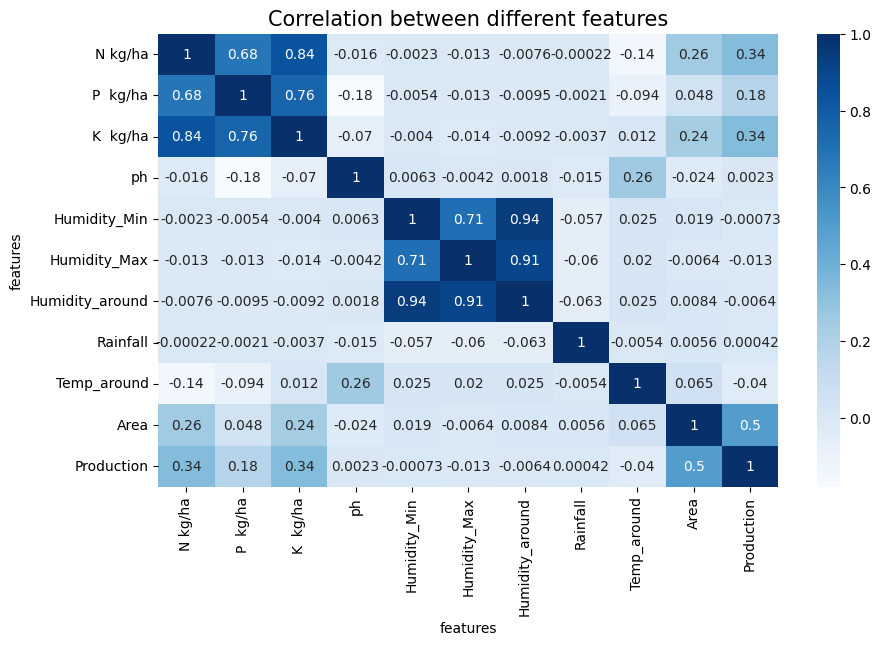

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
sns.heatmap(crop.corr(), annot = True, cmap = 'Blues')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('Correlation between different features', fontsize = 15, c='black')
# plt.tight_layout()
plt.show()

In [49]:
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder()

In [50]:
crop["Crop"]= label_encoder.fit_transform(crop["Crop"]) 
crop["Season"]= label_encoder.fit_transform(crop["Season"]) 

In [51]:
crop

District_Name  Season  Crop    N kg/ha   P  kg/ha   K  kg/ha        ph  \
0         ADILABAD       0     0  25.399955  44.023330  47.866532  7.109764   
1         ADILABAD       0     0  25.942129  43.686642  46.978921  7.419597   
2         ADILABAD       1     0  25.481752  44.183059  47.628207  6.686975   
3         ADILABAD       0     0  29.236268  43.543630  48.151850  7.505164   
4         ADILABAD       1     0  27.062090  44.683242  48.497706  7.435820   
...            ...     ...   ...        ...        ...        ...       ...   
4915      WARANGAL       1    43  60.324727  29.907642  28.842461  6.966914   
4916      WARANGAL       1    43  60.077498  30.760258  30.008775  6.792731   
4917      WARANGAL       1    43  60.527319  30.894878  29.131273  6.107228   
4918      WARANGAL       1    43  60.301643  29.267801  28.669416  6.253218   
4919      WARANGAL       1    43  59.304489  29.147869  30.515483  6.492336   

      Humidity_Min  Humidity_Max  Humidity_around  Rainfall  Temp_around  \
0             29.1          41.2            35.15     798.6    36.388150   
1             21.1          40.3            30.70    1104.0    38.384425   
2             25.4          49.4            37.40     985.8    39.089421   
3             15.8          47.2            31.50     816.0    38.594861   
4             26.1          61.1            43.60     967.0    40.990483   
...            ...           ...              ...       ...          ...   
4915          30.0          79.5            54.75    1280.0    22.171909   
4916          15.7          40.6            28.15    1007.6    23.613905   
4917          34.5          58.2            46.35     983.0    22.291382   
4918          45.1          87.6            66.35     846.6    24.048036   
4919          31.9          89.5            60.70     636.6    21.400858   

       Area  Production  
0     32200      1100.0  
1     35900     12700.0  
2       100       100.0  
3     38996      9437.0  
4       767       186.0  
...     ...         ...  
4915     51        30.0  
4916     45        24.0  
4917     36        30.0  
4918     45        42.0  
4919     20        26.0  

[4920 rows x 14 columns]

In [103]:
crop.dropna(how='any', inplace=True)
crop.shape

(4884, 14)

In [106]:
X = crop[['N kg/ha', 'P  kg/ha','K  kg/ha','Temp_around', 'Humidity_around', 'ph', 'Rainfall']]
y = crop['Crop']

In [107]:
X

N kg/ha   P  kg/ha   K  kg/ha  Temp_around  Humidity_around        ph  \
0     25.399955  44.023330  47.866532    36.388150            35.15  7.109764   
1     25.942129  43.686642  46.978921    38.384425            30.70  7.419597   
2     25.481752  44.183059  47.628207    39.089421            37.40  6.686975   
3     29.236268  43.543630  48.151850    38.594861            31.50  7.505164   
4     27.062090  44.683242  48.497706    40.990483            43.60  7.435820   
...         ...        ...        ...          ...              ...       ...   
4915  60.324727  29.907642  28.842461    22.171909            54.75  6.966914   
4916  60.077498  30.760258  30.008775    23.613905            28.15  6.792731   
4917  60.527319  30.894878  29.131273    22.291382            46.35  6.107228   
4918  60.301643  29.267801  28.669416    24.048036            66.35  6.253218   
4919  59.304489  29.147869  30.515483    21.400858            60.70  6.492336   

      Rainfall  
0        798.6  
1       1104.0  
2        985.8  
3        816.0  
4        967.0  
...        ...  
4915    1280.0  
4916    1007.6  
4917     983.0  
4918     846.6  
4919     636.6  

[4884 rows x 7 columns]

In [108]:
y

0        0
1        0
2        0
3        0
4        0
        ..
4915    43
4916    43
4917    43
4918    43
4919    43
Name: Crop, Length: 4884, dtype: int32

In [109]:
# lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (3907, 7)
The Shape of x test: (977, 7)
The Shape of y train: (3907,)
The Shape of y test: (977,)


In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from mlxtend.plotting import plot_confusion_matrix

In [124]:
def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(10,10),show_normed=True)
    plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
    plt.show()

In [127]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {
          "KNN" : KNeighborsClassifier(),
          "DT" : DecisionTreeClassifier(),
          'RFC' : RandomForestClassifier(),
          'GBC' : GradientBoostingClassifier(),
          'XGB' : XGBClassifier(),
          'GUS' : GaussianNB(),
          'MUL': MultinomialNB()
          }

for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print("\n", test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*' * 100,"\n")
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)


 KNN scores
0.5353121801432958
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.28      0.35      0.31        37
           2       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.38      0.44      0.41        45
           8       0.19      0.35      0.24        17
           9       0.59      0.47      0.52        34
          10       0.22      0.29      0.25         7
          11       0.00      0.00      0.00         1
          12       0.96      0.96      0.96        55
          13       0.83      0.83      0.83         6
          14       0.00      0.00      0.00         2
          16       0.42      0.36      0.39        70
          17       0.21      0.33      0.26        33
          18       0.53      0.68      0.60      

In [128]:
model_accuracy.sort_values(ascending=False, by = 'Accuracy')

Model  Accuracy  Train_acc
2   RFC   0.98567   1.000000
1    DT  0.980553   1.000000
4   XGB  0.978506   1.000000
3   GBC  0.973388   0.999744
5   GUS  0.960082   0.969798
0   KNN  0.535312   0.704633
6   MUL  0.310133   0.342206

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

Gradien = GradientBoostingClassifier()

Gradien.fit(x_train,y_train)

GradientBoostingClassifier()

Accuracy is:  0.9733879222108496

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        37
           2       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.98      0.99        45
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        34
          10       1.00      0.57      0.73         7
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00        55
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         2
          16       0.97      1.00      0.99        70
          17       0.91      0.94      0.93        33
          18       1.0

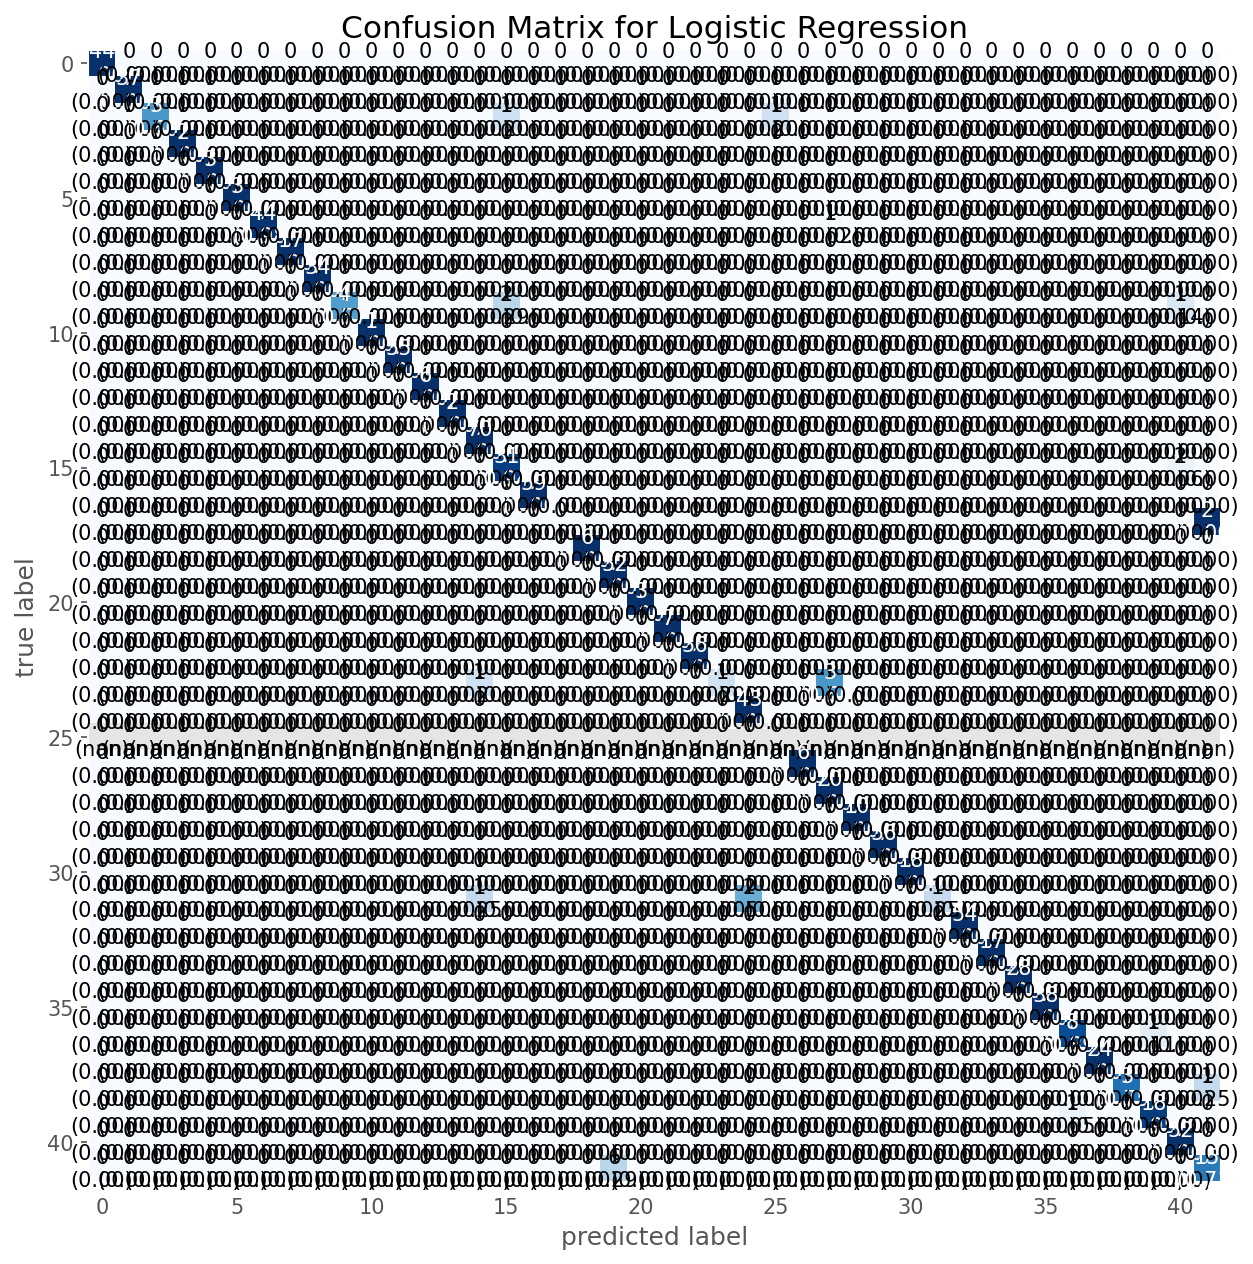

In [120]:
pred_kn = Gradien.predict(x_test)

evaluator(y_test, pred_kn)

In [121]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

Accuracy is:  0.9600818833162743

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        34
          10       0.80      0.57      0.67         7
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00        55
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         2
          16       0.95      1.00      0.97        70
          17       0.79      0.91      0.85        33
          18       1.0

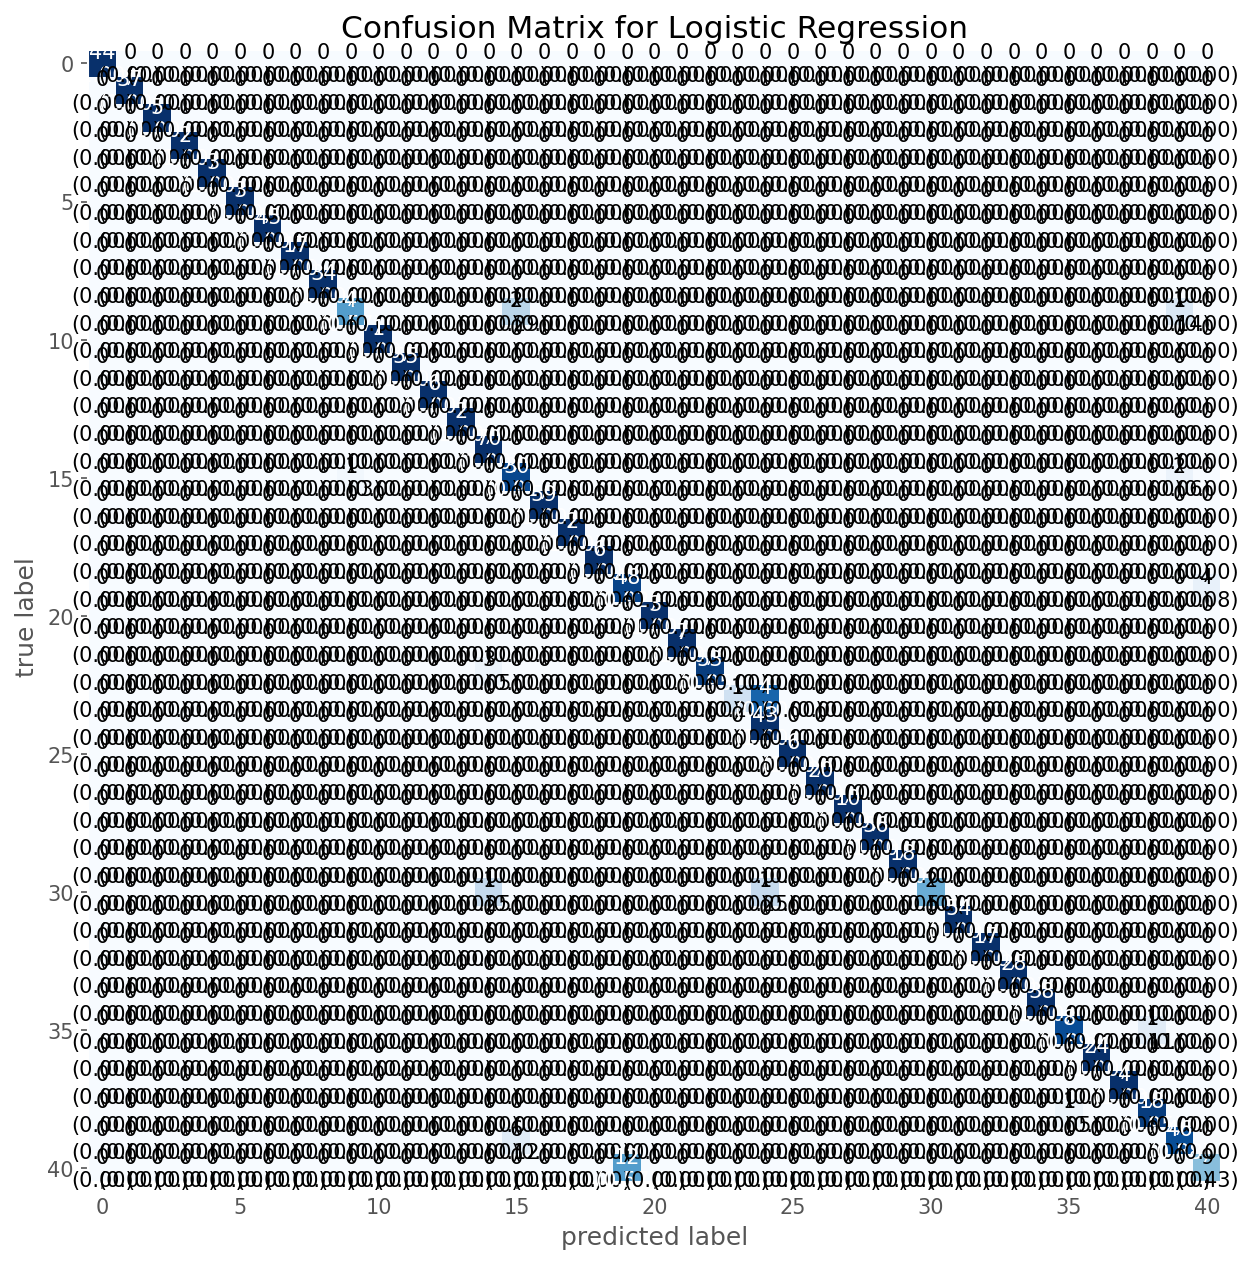

In [122]:
pred_grd = model.predict(x_test)

evaluator(y_test, pred_grd)